In [ ]:
#Importing standard Libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

Assuming SCARA Manipulator

In [ ]:
# Finding x,y,z position, velocity and acceleration
x = np.array([])
vx = np.array([])
ax = np.array([])

y = np.array([])
vy = np.array([])
ay = np.array([])

z = np.array([])
vz = np.array([])
az = np.array([])

A = np.array([])
for t in range(0,110,1):
    x = np.append(x,0.4)
    vx = np.append(vx,0)
    ax = np.append(ax,0)
    
    y = np.append(y,0.06 -0.5*((t/100)**3)+0.75*((t/100)**4)-0.3*((t/100)**5))
    vy = np.append(vy,-3*0.5*((t/100)**2)+4*0.75*((t/100)**3)-5*0.3*((t/100)**4))
    ay =np.append(ay,-6*0.5*((t/100))+12*0.75*((t/100)**2)-20*0.3*((t/100)**3))
    
    z = np.append(z,0.1)
    vz = np.append(vz,0)
    az = np.append(az,0)

    A = np.append(A,t/100)

In [ ]:
# SCARA manipulator
#Let us assume
l1 = 0.5
l2 = 0.5
l3 = 0.25
d1 = 0.25
def inverse_kinematics_SCARA(O):

    c2 = (O[0]**2 + O[1]**2 - l1**2 - l2**2)/(2*l1*l2)
    theta2 = np.arctan2(-(1-c2**2)**0.5,c2)
    theta1 = np.arctan2(O[1],O[0]) - np.arctan2(l2*np.sin(theta2),l1 + l2*np.cos(theta2))

    d3 = d1 - O[2] 

    I = np.array([theta1,theta2,d3])
    return(I)

q1 = np.array([])
q2 = np.array([])
d3 = np.array([])
for i in range(len(x)):
    I = inverse_kinematics_SCARA([x[i],y[i],z[i]])
    q1 = np.append(q1,I[0])
    q2 = np.append(q2,I[1])
    d3 = np.append(d3,I[2])

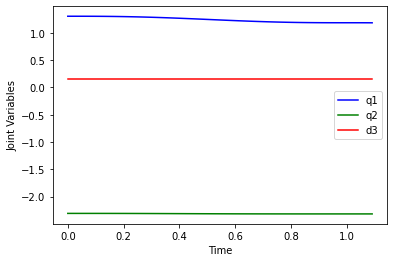

In [ ]:
# Joint trajectories plot
plt.plot(A,q1,'b',A,q2,'g',A,d3,'r')
plt.xlabel('Time')
plt.ylabel('Joint Variables')
plt.legend(['q1','q2','d3'])